In [11]:
import sys

import matplotlib
import numpy as np
import pandas as pd
import os
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from display_plot_utils import read_methods_results, results_base_path, methods, save_figure
from display_plot_utils import seeds, get_display_method_name, color_palette, methods_order
from display_plot_utils import get_masker_from_method_name, process_methods_names, process_methods_df

matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rc('font', **{'size': 20})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# def get_display_method_name(method_name):
#     masker = get_masker_from_method_name(method_name)
#     if 'weighted' in method_name:
#         if masker == 'with z' or masker == 'oracle':
#             return "Infeasible WCP"
#         else:
#             return 'Naive WCP'
#     if 'Two Staged' in method_name:
#         return "Two Staged CP"
#     if 'PCP' in method_name:
#         return 'Privileged CP'
#     return method_name


# color_palette = {'Naive CP': "b",
#                  'Naive CP\n(clean + noisy)': "b",
#                  'Naive CP\n(only clean)': "m",
#                  'Naive JP': "b",
#                  'Naive WCP': "r",
#                  'Naive JAWS': "r",
#                  'Two Staged CP': "y",
#                  'Infeasible WCP': "g",
#                  'Infeasible JAWS': "g",
#                  'Privileged CP': "c",
#                  }

# methods_order = ['Naive CP', 'Naive CP\n(clean + noisy)', 'Naive CP\n(only clean)',
#                  'Naive JP',
#                  'Naive WCP', 'Naive JAWS',
#                  'Two Staged CP', 'Infeasible WCP', 'Infeasible JAWS',
#                  'Privileged CP']


# Figures

## Causal Inference example - IHDP dataset

['Uncalibrated' 'Naive CP' 'Naive CP (only clean)' 'clean Y cqr '
 'weighted xgb use z=False masker' 'PCP xgb use z=False masker'
 'weighted xgb use z=True masker' 'PCP xgb use z=True masker'
 'weighted oracle masker' 'PCP oracle masker']


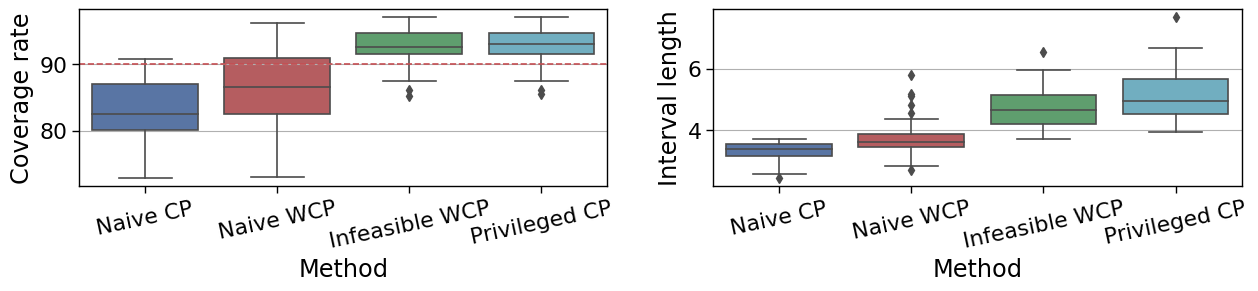

In [14]:
dataset = 'missing_y_ihdp' 

total_df = read_methods_results(results_base_path, dataset, methods, apply_mean=False, seeds=seeds)
total_df = process_methods_names(process_methods_df(total_df))
print(total_df['Method'].unique())

# methods_to_keep = ['Naive CP (only clean)', 'weighted xgb use z=True masker',
#                    'weighted xgb use z=False', 'PCP xgb use z=True masker']

methods_to_keep = ['Naive CP (only clean)', 'weighted oracle masker',
                   'weighted xgb use z=False', 'PCP oracle masker']

methods_to_exclude = []
def keep_method(method_name):
    return any([a in method_name for a in methods_to_keep]) and not any([a in method_name for a in methods_to_exclude])


total_df = total_df[total_df['Method'].apply(keep_method)]
total_df['Masker'] = total_df['Method'].apply(lambda x: get_masker_from_method_name(x) )
total_df['Method'] = total_df['Method'].apply(get_display_method_name)
total_df['Method'] = total_df['Method'].apply(lambda x: x.replace('Naive CP (only clean)', 'Naive CP'))
total_df['Method'] = total_df['Method'].apply(lambda x: x.replace('Naive CP', 'Naive CP'))
total_df['Method'] = total_df['Method'].apply(lambda x: x.replace('Naive WCP', 'Naive WCP'))
total_df['Method'] = total_df['Method'].apply(lambda x: x.replace('Infeasible WCP', 'Infeasible WCP'))


# sns.set(font_scale=2)
sns.set_theme(context='paper', style={
     'xtick.color': 'black',
     'ytick.color': 'black',
     'xtick.direction': 'out',
     'ytick.direction': 'out',
     'xtick.bottom': True,
     'xtick.top': False,
     'ytick.left': True,
     'ytick.right': False,
     'axes.facecolor': 'white',
     'axes.edgecolor': 'black',
     'axes.grid': True,
    }, 
    font_scale=1.8, rc={'figure.figsize':(6,2.3)})


# invert the grispec ratios
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,
                             gridspec_kw={'width_ratios':[1, 1]}, figsize=(15,2.3))

xticks_rotation = 12

curr_methods_order = [m for m in methods_order if m in total_df['Method'].unique()]

sns.boxplot(data=total_df, x='Method', y='full y2 coverage', palette=color_palette,
           order=curr_methods_order, ax=ax1)

ax1.set_ylabel("Coverage rate")
# plt.xticks(rotation=12)

ax1.axhline(y=90, color='r', linestyle='--')
ax1.set_xticklabels(curr_methods_order, rotation=12)


sns.boxplot(data=total_df, x='Method', y='y2 length', palette=color_palette, order=curr_methods_order,
           ax=ax2)
ax2.set_ylabel("Interval length")
ax2.set_xticklabels(curr_methods_order, rotation=12)
# f.suptitle("Causal inference experiment - IHDP dataset")
save_figure("ihdp", "ihdp.png")
plt.show()


## Noisy Cifar-10 experiment

['Naive CP' 'Naive CP (only clean)' 'clean Y hps '
 'weighted cnn use z=False masker' 'Two Staged cnn use z=False masker'
 'PCP cnn use z=False masker' 'weighted network use z=True masker'
 'Two Staged network use z=True masker' 'PCP network use z=True masker']


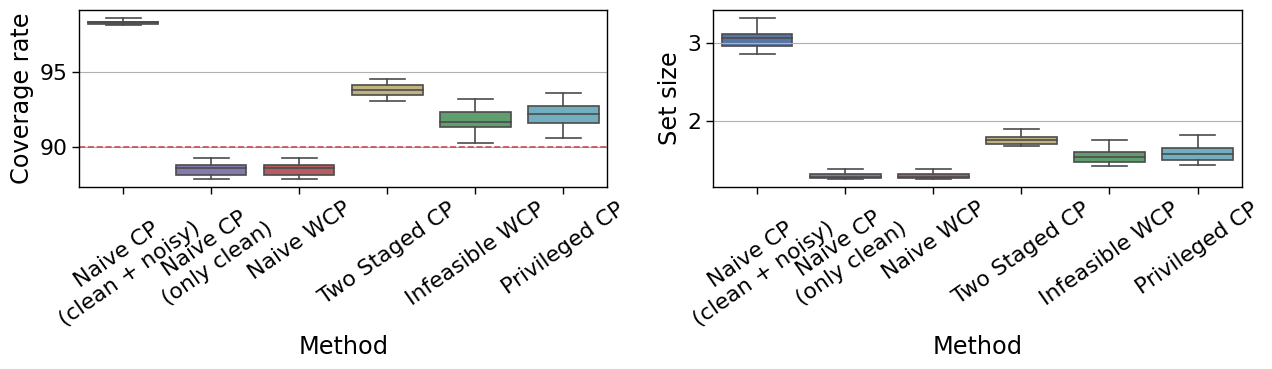

In [15]:
seeds = 30
dataset = 'noised_y_cifar10'  

total_df = read_methods_results(results_base_path, dataset, methods, apply_mean=False, seeds=seeds,
                               display_errors=False)
total_df = process_methods_names(process_methods_df(total_df))
print(total_df['Method'].unique())
methods_to_keep = ['Naive', 'weighted cnn use z=False', 
                   'Two Staged cnn use z=False',
                   'weighted network use z=True masker',
                   'PCP network use z=True masker']
methods_to_exclude = []
def keep_method(method_name):
    return any([a in method_name for a in methods_to_keep]) and not any([a in method_name for a in methods_to_exclude])


total_df = total_df[total_df['Method'].apply(keep_method)]
total_df['Method'] = total_df['Method'].apply(get_display_method_name)
total_df['Method'] = total_df['Method'].apply(lambda x: 'Naive CP\n(clean + noisy)' if x == 'Naive CP' else x)
total_df['Method'] = total_df['Method'].apply(lambda x: 'Naive CP\n(only clean)' \
                                              if x == 'Naive CP (only clean)' else x)


xticks_rotation = 35
curr_methods_order = [m for m in methods_order if m in total_df['Method'].unique()]
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,
                             gridspec_kw={'width_ratios':[1, 1]}, figsize=(15,2.3))

sns.boxplot(data=total_df, x='Method', y='full y2 coverage', showfliers = False, palette=color_palette,
           order=curr_methods_order, ax=ax1)
ax1.set_ylabel("Coverage rate")
ax1.axhline(y=90, color='r', linestyle='--')
ax1.set_xticklabels(curr_methods_order, rotation=xticks_rotation)

sns.boxplot(data=total_df, x='Method', y='y2 length', showfliers = False, palette=color_palette,
           order=curr_methods_order, ax=ax2)
ax2.set_xticklabels(curr_methods_order, rotation=xticks_rotation)

ax2.set_ylabel("Set size")
# f.suptitle("Noisy response experiment - CIFAR-10N dataset")

save_figure("cifar10", "cifar10.png")
plt.show()


## Missing response variable

corruption type: missing_y
['Naive CP' 'weighted network use z=False masker' 'weighted oracle masker'
 'Two Staged oracle masker' 'PCP oracle masker']


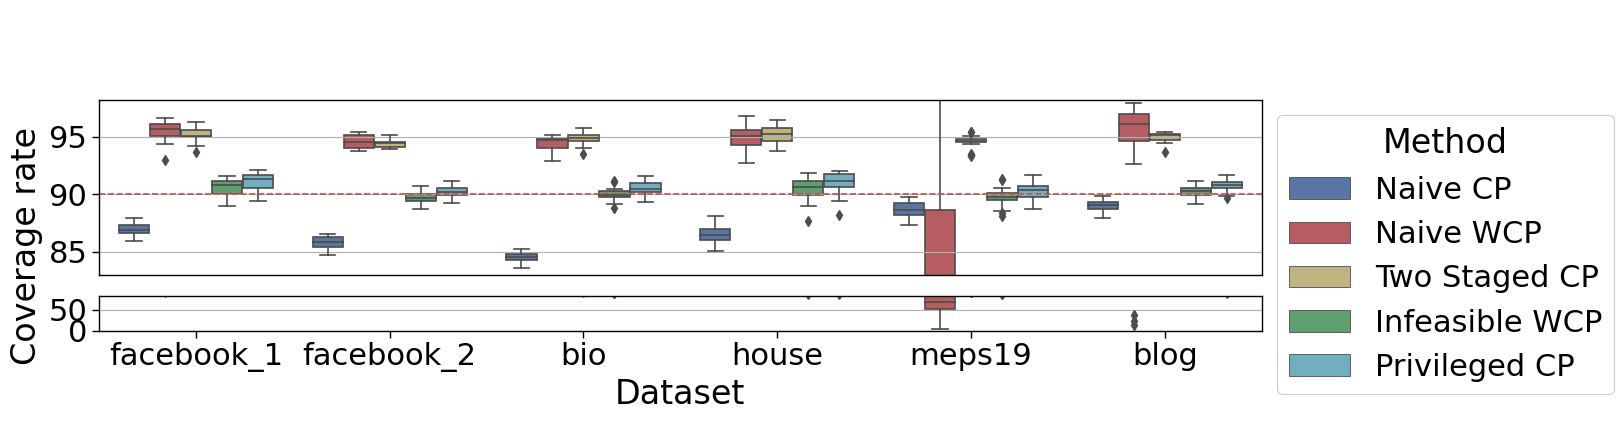

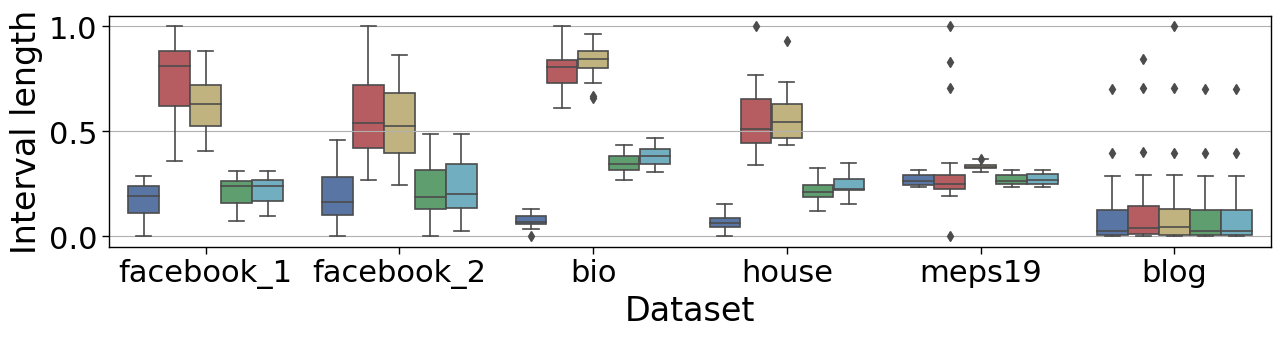

In [16]:
total_df = pd.DataFrame()
original_dataset_names = ['facebook_1', 'facebook_2', 'bio', 'house', 'meps_19', 'blog'] # 'blog' 'meps_19'
corruption_type = 'missing_y'
print(f"corruption type: {corruption_type}")

methods_to_keep = ['Naive', 'Two Staged oracle masker', 
                   'weighted network use z=False',
#                    'weighted xgb use z=False',
                   'weighted oracle masker',
                   'PCP oracle masker']
methods_to_exclude = ['Naive CP (only clean)'] # ['nn errors', 'cvae errors', 'oracle',  'use z=true']
def keep_method(method_name):
    return any([a in method_name for a in methods_to_keep]) and not any([a in method_name for a in methods_to_exclude])

for dataset_name in [f"{corruption_type}_{d}" for d in original_dataset_names]:
    try:
        data_df = read_methods_results(results_base_path, dataset_name, methods, apply_mean=False, seeds=seeds)
        data_df = process_methods_df(data_df)
        data_df['Dataset'] = dataset_name.replace(f"{corruption_type}_", "").replace("meps_19", "meps19")
        data_df = data_df[data_df['Method'].apply(keep_method)]
        data_df['y2 length'] -= data_df['y2 length'].min()
        data_df['y2 length'] /= data_df['y2 length'].max()
        total_df = pd.concat([total_df, data_df])
    except Exception as e:
        print(f"data: {dataset_name}, error: {e}")
print(total_df['Method'].unique())

# display(total_df)

sns.set_theme(context='paper', style={
     'xtick.color': 'black',
     'ytick.color': 'black',
     'xtick.direction': 'out',
     'ytick.direction': 'out',
     'xtick.bottom': True,
     'xtick.top': False,
     'ytick.left': True,
     'ytick.right': False,
     'axes.facecolor': 'white',
     'axes.edgecolor': 'black',
     'axes.grid': True,
    }, 
    font_scale=2.5, rc={'figure.figsize':(15,3)})

matplotlib.rc('font', **{'size': 50})


# total_df['Method'] = total_df['Method'].apply(lambda x: x.replace("imputation", ""))
total_df['Method'] = total_df['Method'].apply(get_display_method_name)

# invert the grispec ratios
f, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,
                             gridspec_kw={'height_ratios':[5, 1]}, figsize=(15,3))

# change the limits
curr_methods_order = [m for m in methods_order if m in total_df['Method'].unique()]

# ax1.set_title("Missing response experiment: tabular datasets")

sns.boxplot(data=total_df, x='Dataset', y='full y2 coverage', hue='Method', ax=ax1, palette=color_palette,
           hue_order=curr_methods_order)
sns.boxplot(data=total_df, x='Dataset', y='full y2 coverage', hue='Method', ax=ax2, palette=color_palette,
           hue_order=curr_methods_order)

ax1.set_ylim(83, 98.2)

ax2.set_ylim(0, 83)


ax1.set_ylabel("Coverage rate           ")
ax2.set_ylabel("")

# ax1.set_xlabel("shai")
# ax1.legend().remove()
ax2.legend().remove()

# ax1.spines['top'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)

sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
ax2.set_xlabel("Dataset")

ax1.axhline(y=90, color='r', linestyle='--')

# legend = plt.legend()
# legend.get_frame().set_alpha(None)
# legend.get_frame().set_facecolor((0, 0, 1, 0.1))
# plt.title(f'Corruption: {corruption_type.replace("_", " ")}')
# plt.ylim(83, 98.2)
# plt.ylabel("$Y$ coverage")
save_figure("missing_y", "coverage.png")
plt.show()


sns.set_theme(context='paper', style={
     'xtick.color': 'black',
     'ytick.color': 'black',
     'xtick.direction': 'out',
     'ytick.direction': 'out',
     'xtick.bottom': True,
     'xtick.top': False,
     'ytick.left': True,
     'ytick.right': False,
     'axes.facecolor': 'white',
     'axes.edgecolor': 'black',
     'axes.grid': True,
    }, 
    font_scale=2.5, rc={'figure.figsize':(15,3)})



ax = sns.boxplot(data=total_df, x='Dataset', y='y2 length', hue='Method', palette=color_palette,
                hue_order=curr_methods_order)
plt.ylabel("Interval length")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# legend = plt.legend()
# legend.get_frame().set_alpha(None)
# legend.get_frame().set_facecolor((0, 0, 1, 0.1))
plt.legend().remove()
# plt.ylim(top=1.)
# plt.title(f'Corruption: {corruption_type.replace("_", " ")}')
save_figure("missing_y", "length.png")
plt.show()
